### Flight Fare  Prediction

##### Attribute Information :
1. Airline: So this column will have all the types of airlines like Indigo, Jet Airways,
Air India, and many more.
2. Date_of_Journey: This column will let us know about the date on which the
passenger’s journey will start.
3. Source: This column holds the name of the place from where the passenger’s
journey will start.
4. Destination: This column holds the name of the place to where passengers
wanted to travel.
5. Route: Here we can know about what the route is through which passengers
have opted to travel from his/her source to their destination.
6. Arrival_Time: Arrival time is when the passenger will reach his/her destination.

7. Duration: Duration is the whole period that a flight will take to complete its
journey from source to destination.
8. Total_Stops: This will let us know in how many places flights will stop there for
the flight in the whole journey.
9. Additional_Info: In this column, we will get information about food, kind of food,
and other amenities.
10. Price: Price of the flight for a complete journey including all the expenses
before onboarding.

In [2]:
### Importing required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
### Reading the file using pandas

Flight = pd.read_excel('Flight_Fare.xlsx')

In [4]:
Flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
## Top 5
Flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
## Bottom 5
Flight.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [7]:
## Info
Flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
## Statistical summary of the Dataset
Flight.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
### Checking for null values
Flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

###### Since there are onnly 2 null values that were low as awhole, lets drop the null values

In [11]:
## Dropping the null values
Flight.dropna(inplace = True)

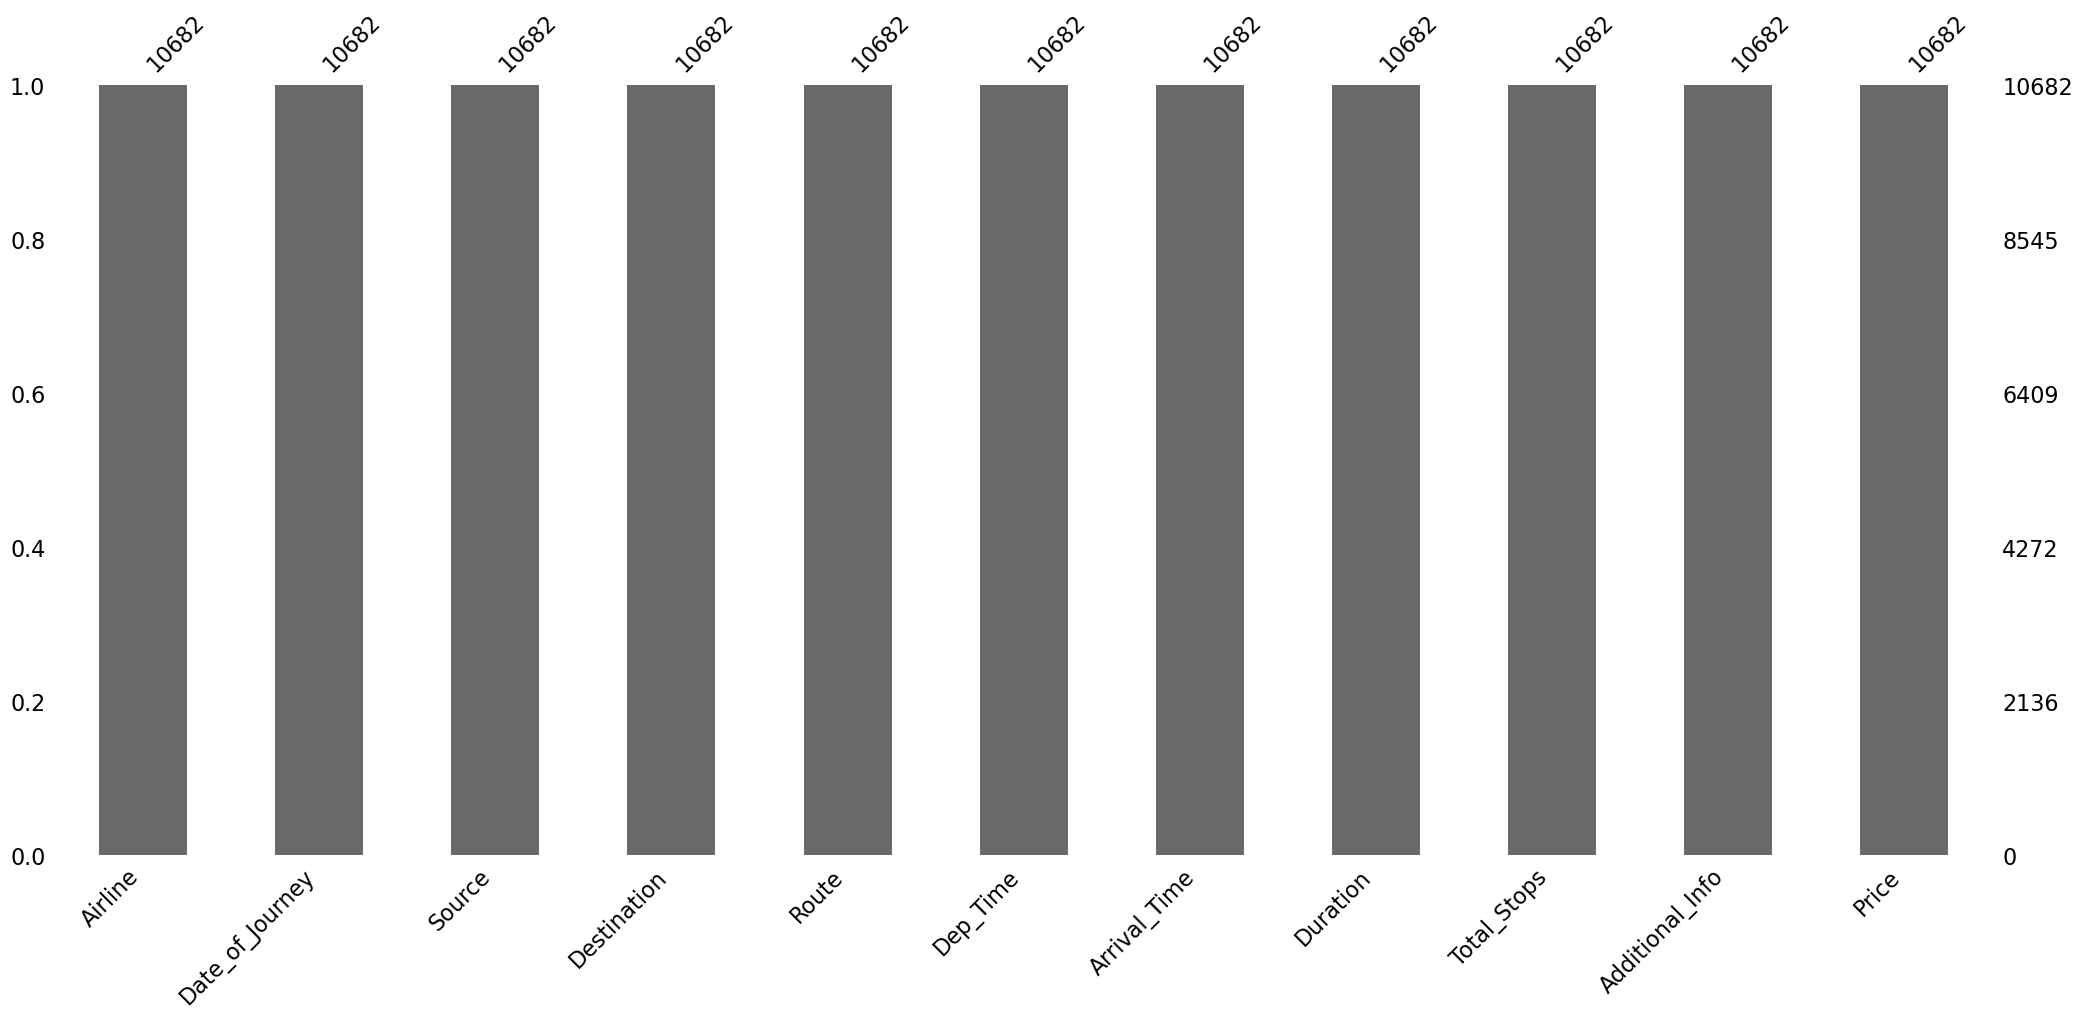

In [12]:
# Visual Representation after dropping the null values
import missingno as msno
msno.bar(Flight)
plt.show()

###### The columns Date_of_Journey, Arrival_Time and Dep_Time are in 'object' datatype, Converting them into 'Datetime' datatype

In [14]:
## Creating a fun to change the required columns to datetime datatype
def change_to_datetime(col):
    Flight[col] = pd.to_datetime(Flight[col])

In [15]:
## Converting the columns into datetime dtype
for i in ['Date_of_Journey', 'Arrival_Time', 'Dep_Time']:
    change_to_datetime(i)

In [16]:
Flight.dtypes  ## data Type conversion has been made

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [17]:
## Extracting day and month from the Date_of_Journey column
Flight['Day_of_Journey'] = Flight['Date_of_Journey'].dt.day
Flight['Month_of_Journey'] = Flight['Date_of_Journey'].dt.month

In [18]:
## Dropping the Date_of_Journey column
Flight.drop('Date_of_Journey', axis = 1, inplace = True)

In [19]:
Flight.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,2025-02-05 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-05 05:50:00,2025-02-05 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2025-02-05 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2025-02-05 18:05:00,2025-02-05 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2025-02-05 16:50:00,2025-02-05 21:35:00,4h 45m,1 stop,No info,13302,1,3


##### Hours and Minutes are to be extracted from Arrival_Time and Dep_Time column

In [21]:
## Creating function to extract minutes and hours

def extract_hour(data,col):
    data[col + 'hour'] = data[col].dt.hour

def extract_minutes(data,col):
    data[col + 'minutes'] = data[col].dt.minute

In [22]:
### Extracting Hours and Minutes from Dep_Time
extract_hour(Flight,'Dep_Time')
extract_minutes(Flight,'Dep_Time')

In [23]:
### Extracting Hours and Minutes from Arrival_Time
extract_hour(Flight,'Arrival_Time')
extract_minutes(Flight,'Arrival_Time')

In [24]:
Flight.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              10682 non-null  object        
 1   Source               10682 non-null  object        
 2   Destination          10682 non-null  object        
 3   Route                10682 non-null  object        
 4   Dep_Time             10682 non-null  datetime64[ns]
 5   Arrival_Time         10682 non-null  datetime64[ns]
 6   Duration             10682 non-null  object        
 7   Total_Stops          10682 non-null  object        
 8   Additional_Info      10682 non-null  object        
 9   Price                10682 non-null  int64         
 10  Day_of_Journey       10682 non-null  int32         
 11  Month_of_Journey     10682 non-null  int32         
 12  Dep_Timehour         10682 non-null  int32         
 13  Dep_Timeminutes      10682 non-null 

In [25]:
## Droping Dep_Time
Flight.drop('Dep_Time', axis = 1, inplace = True)

In [26]:
## Droping Arrival_Time
Flight.drop('Arrival_Time', axis = 1, inplace = True)

In [27]:
Flight.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_Timehour', 'Dep_Timeminutes', 'Arrival_Timehour',
       'Arrival_Timeminutes'],
      dtype='object')

##### Seperating Duration hours and Duration minutes from the Duration column

In [29]:
def extract_duration(duration):
    hours, minutes = 0, 0  # Default values for hours and minutes
    
    # Check if 'h' (hours) exists in the string
    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())  # Extract hours and convert to integer
        duration = duration.split('h')[1].strip()  # Keep the part after 'h' (could be empty if no minutes)

    # Check if 'm' (minutes) exists in the remaining part of the string
    if 'm' in duration:
        minutes = int(duration.split('m')[0].strip())  # Extract minutes and convert to integer
    
    return hours, minutes

# Step 2: Apply the function to the 'Duration' column and create new columns for 'Duration_Hours' and 'Duration_Minutes'
Flight[['Duration_Hours', 'Duration_Minutes']] = Flight['Duration'].apply(lambda x: pd.Series(extract_duration(x)))

In [30]:
Flight.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Route                10682 non-null  object
 4   Duration             10682 non-null  object
 5   Total_Stops          10682 non-null  object
 6   Additional_Info      10682 non-null  object
 7   Price                10682 non-null  int64 
 8   Day_of_Journey       10682 non-null  int32 
 9   Month_of_Journey     10682 non-null  int32 
 10  Dep_Timehour         10682 non-null  int32 
 11  Dep_Timeminutes      10682 non-null  int32 
 12  Arrival_Timehour     10682 non-null  int32 
 13  Arrival_Timeminutes  10682 non-null  int32 
 14  Duration_Hours       10682 non-null  int64 
 15  Duration_Minutes     10682 non-null  int64 
dtypes: int32(

In [31]:
### Dropping the Duration Column

Flight.drop('Duration', axis = 1, inplace = True)

In [32]:
Flight.head() ## Top 10 rows after dropping the Duration column

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Timehour,Dep_Timeminutes,Arrival_Timehour,Arrival_Timeminutes,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [33]:
categorical_column = []
contineous_column = []

for i in Flight.columns:
    if Flight[i].dtype == 'object':
        categorical_column.append(i)
    else:
        contineous_column.append(i)

In [34]:
## Categorical column
categorical_column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [35]:
## Contineous column
contineous_column

['Price',
 'Day_of_Journey',
 'Month_of_Journey',
 'Dep_Timehour',
 'Dep_Timeminutes',
 'Arrival_Timehour',
 'Arrival_Timeminutes',
 'Duration_Hours',
 'Duration_Minutes']

In [36]:
## Handling Categorical datas

##### Analysis of categorical values with the Price(Target Variable)

##### Airline vs Price analysis

<Axes: xlabel='Airline', ylabel='Price'>

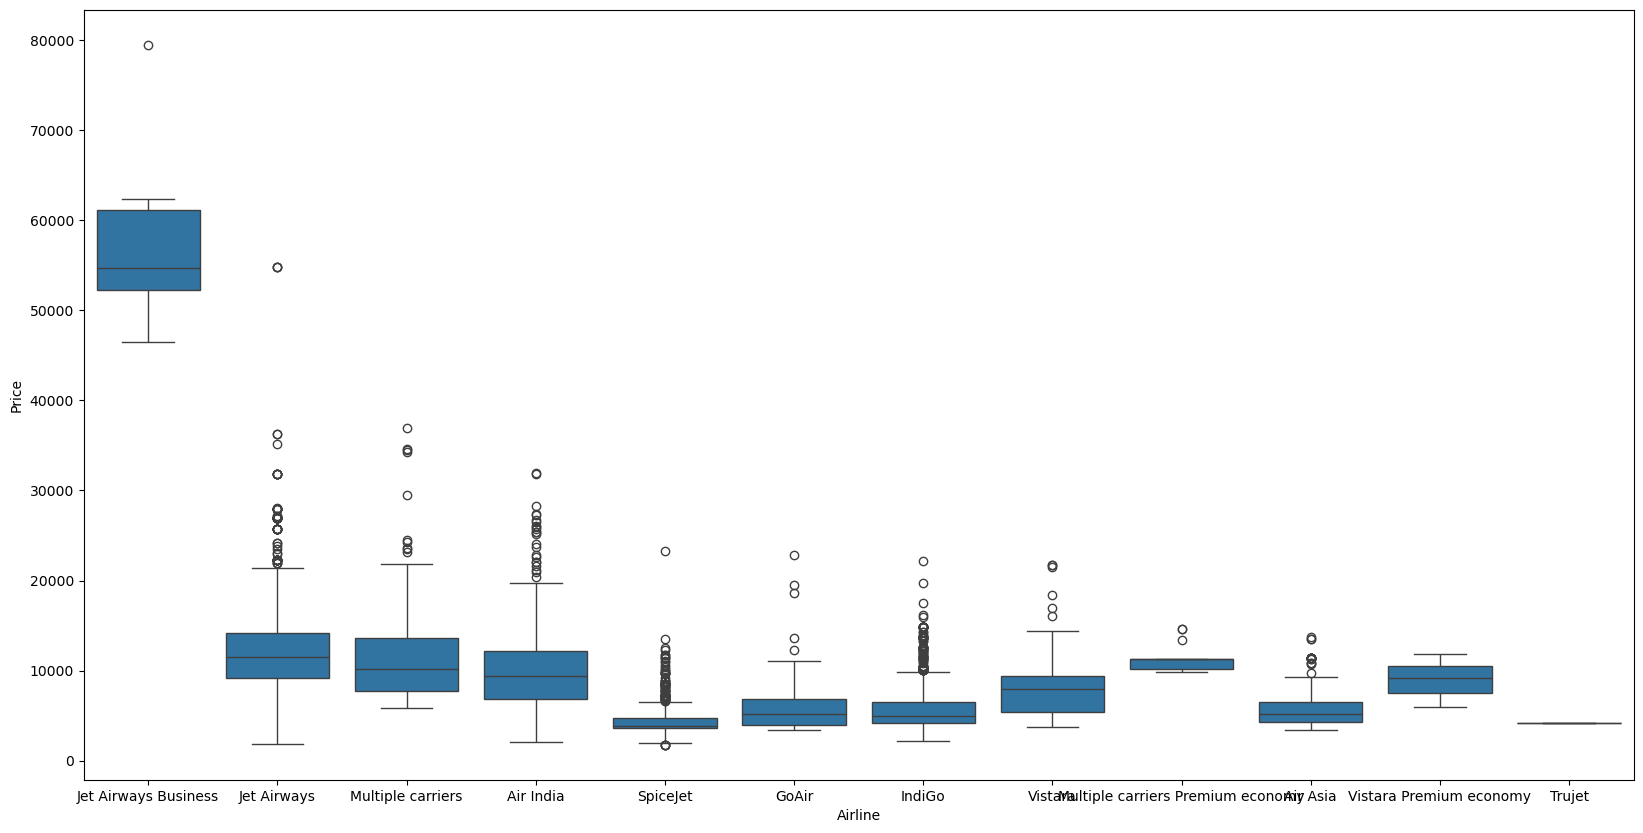

In [39]:
plt.figure(figsize = (20,10))
sns.boxplot(x = 'Airline', y = 'Price', data = Flight.sort_values('Price', ascending = False))

##### Source vs Price(Target Variable)

<Axes: xlabel='Source', ylabel='Price'>

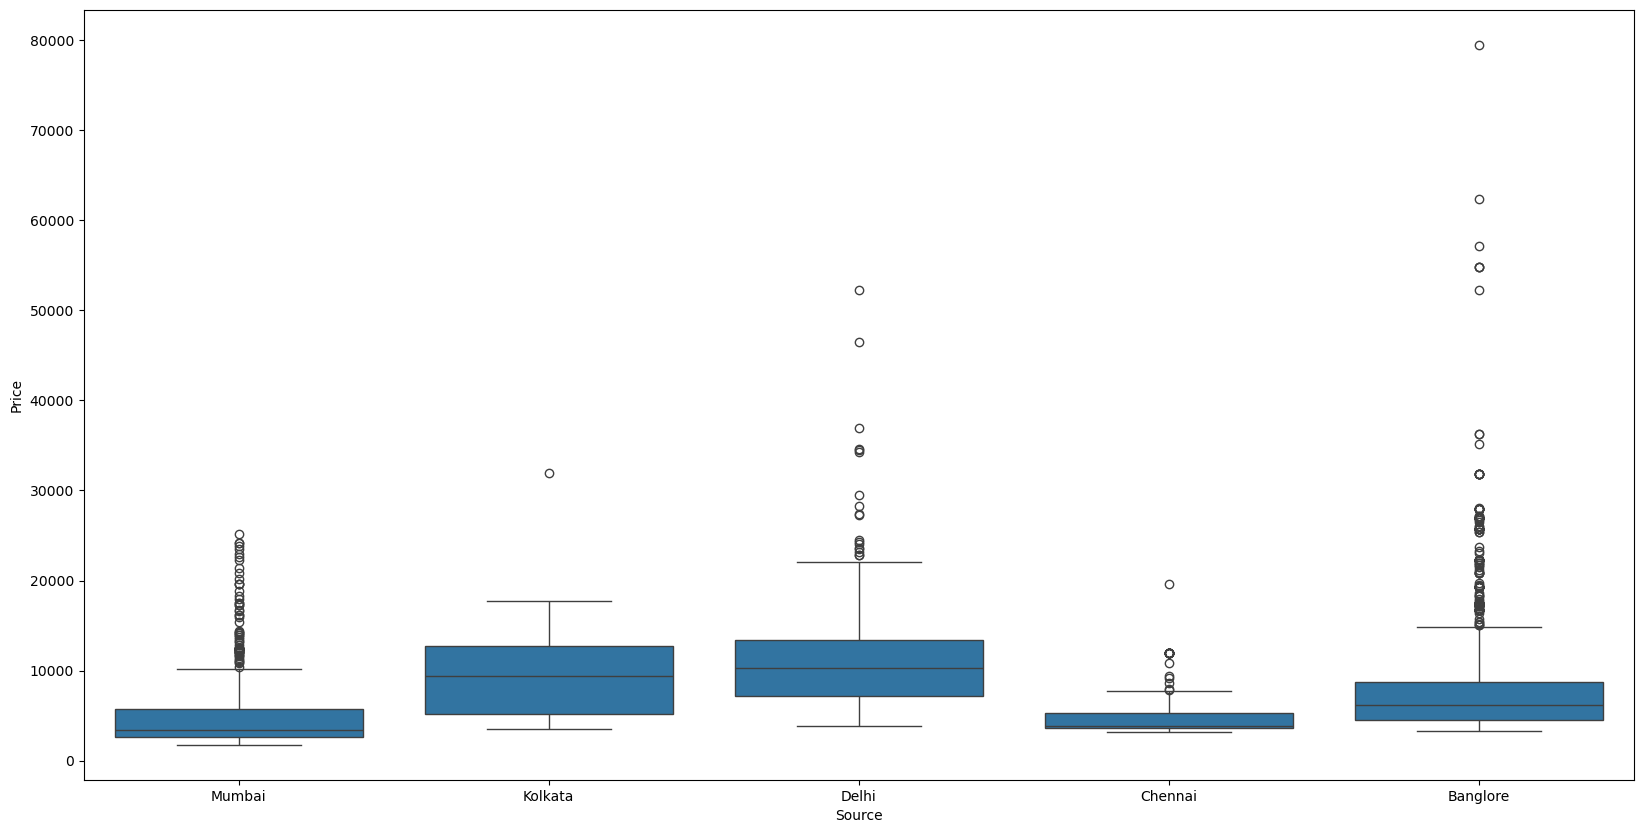

In [41]:
plt.figure(figsize = (20,10))
sns.boxplot(x = 'Source', y = 'Price', data = Flight.sort_values('Source', ascending = False))

##### Destination vs Price(Target Variable)

<Axes: xlabel='Destination', ylabel='Price'>

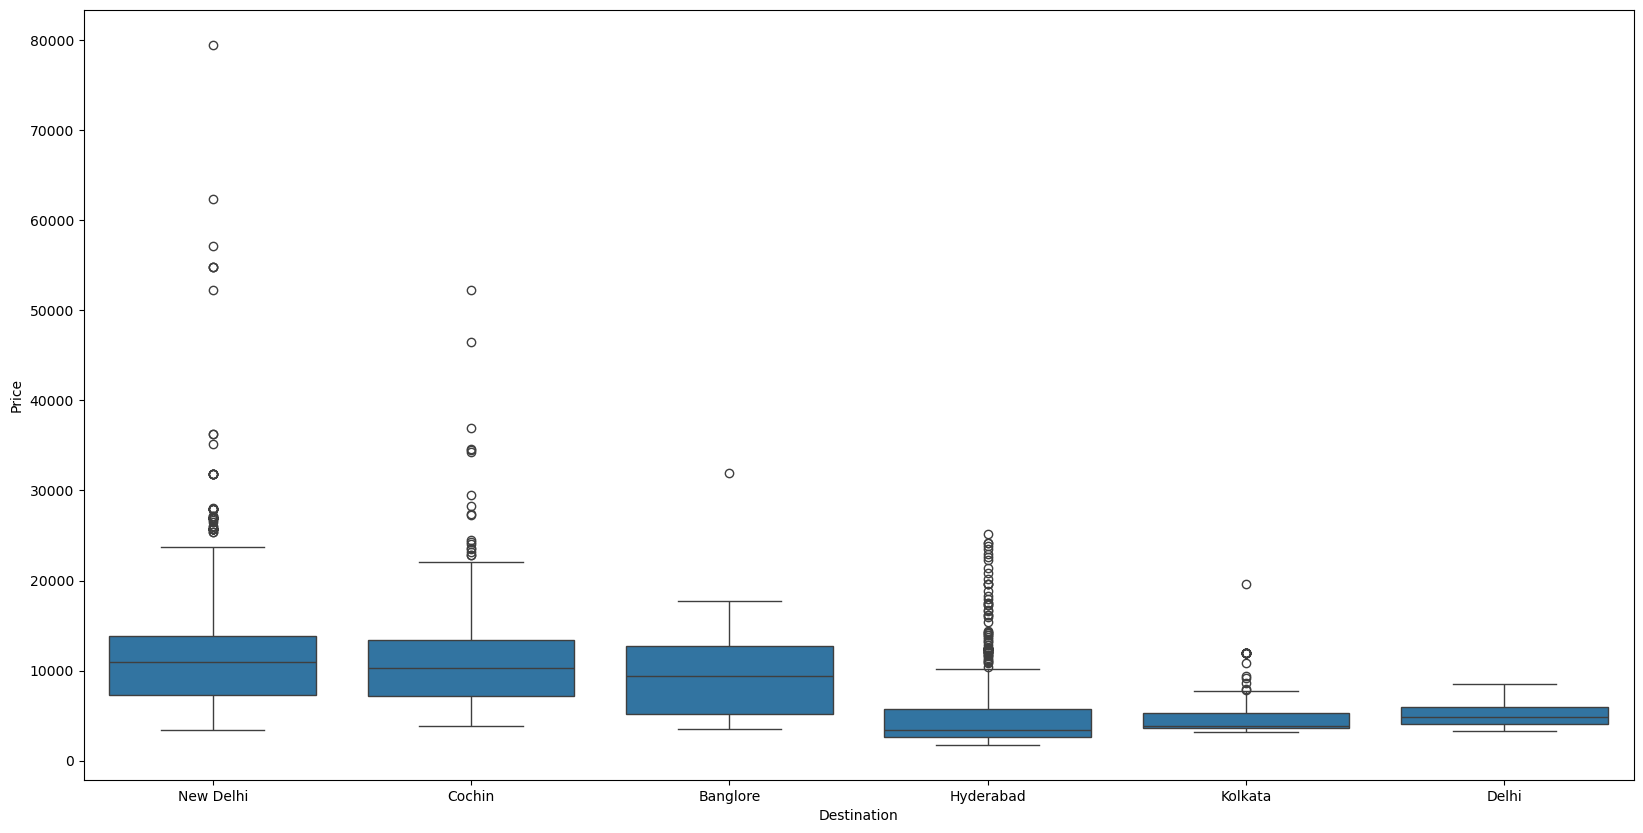

In [43]:
plt.figure(figsize = (20,10))
sns.boxplot(x = 'Destination', y = 'Price', data = Flight.sort_values('Price', ascending = False))

##### Total_Stops vs Price(Target Variable)

<Axes: xlabel='Total_Stops', ylabel='Price'>

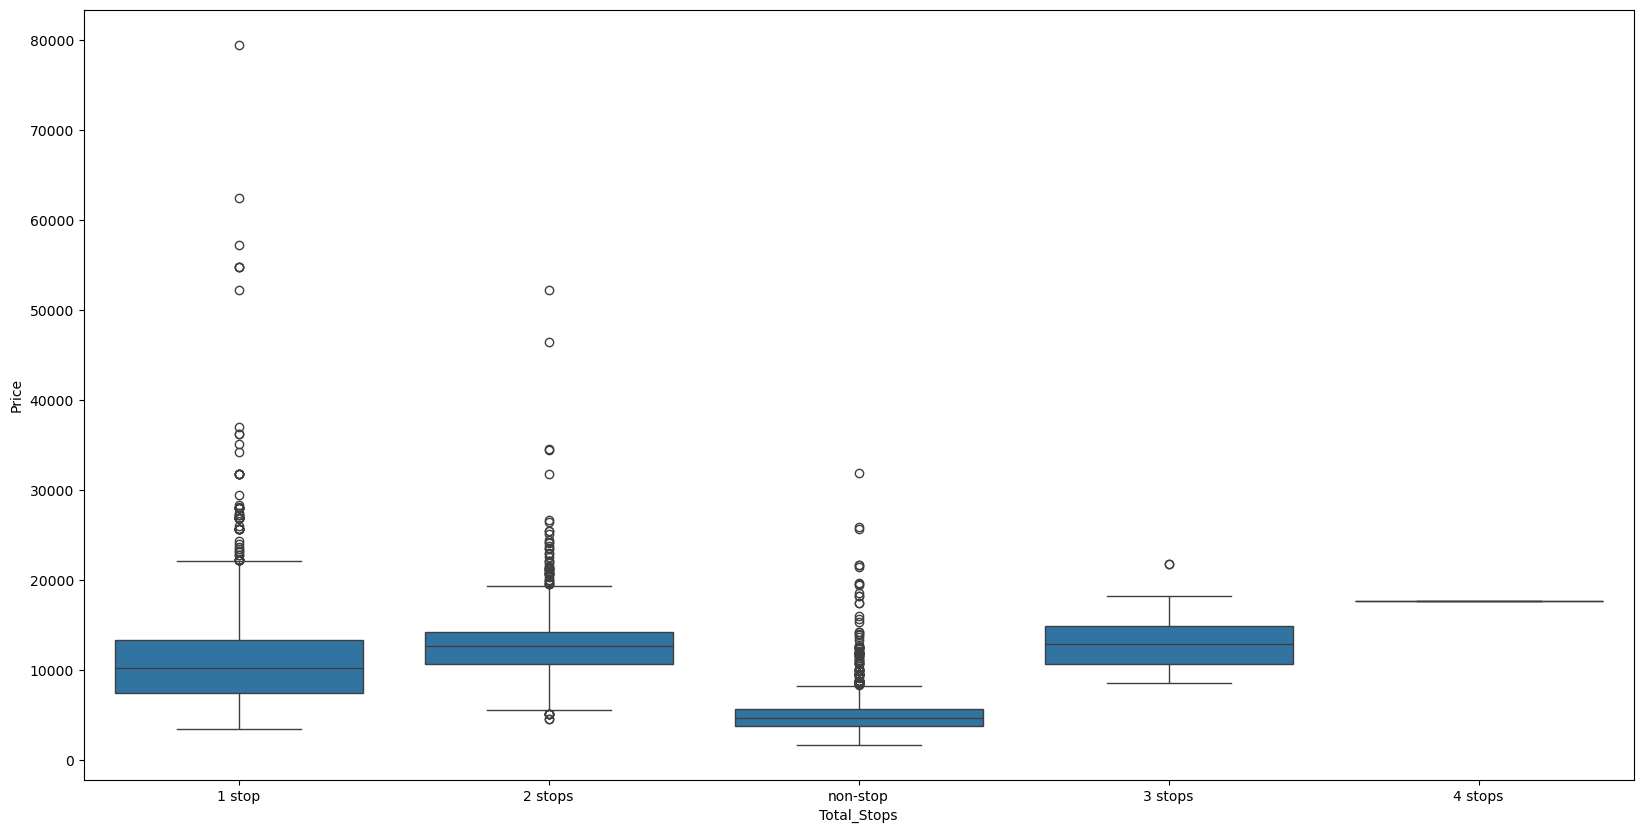

In [45]:
plt.figure(figsize = (20,10))
sns.boxplot(x = 'Total_Stops', y = 'Price', data = Flight.sort_values('Price', ascending = False))

In [46]:
categorical = Flight[categorical_column]

In [47]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [86]:
categorical.drop('Additional_Info', axis = 1, inplace = True)

In [88]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Airline      10682 non-null  object
 1   Source       10682 non-null  object
 2   Destination  10682 non-null  object
 3   Route        10682 non-null  object
 4   Total_Stops  10682 non-null  object
dtypes: object(5)
memory usage: 500.7+ KB


In [90]:
Airline = pd.get_dummies(categorical['Airline'], drop_first=True).astype(int)

In [92]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


##### Applied one hot encoding or get_dummies to convert the categorical columns into a numerical column

In [95]:
## Applying one_hot_encoding or get_dummies for Source column
source = pd.get_dummies(categorical['Source'], drop_first = True).astype(int)

In [97]:
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [99]:
#encoding of destination column
destination = pd.get_dummies(categorical['Destination'],drop_first=True).astype(int)

In [101]:
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


#### Working on Route column

In [104]:
categorical['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [106]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

In [108]:
categorical.drop('Route', axis = 1, inplace = True)

In [110]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,BLR,NAG,DEL,NaN,NaN


In [112]:
### Checking for null values inthee 'categorical' dataframe created by us
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Route1             0
Route2             0
Route3          3491
Route4          9116
Route5         10636
dtype: int64

In [114]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None', inplace = True)

In [116]:
categorical.isnull().sum()

Airline        0
Source         0
Destination    0
Total_Stops    0
Route1         0
Route2         0
Route3         0
Route4         0
Route5         0
dtype: int64

In [118]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


In [120]:
from sklearn.preprocessing import LabelEncoder

In [122]:
encoder = LabelEncoder()

In [124]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [126]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [128]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [130]:
# encoding Total stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [132]:
categorical['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [134]:
## Dropping 'Airline' column
categorical.drop('Airline', axis = 1, inplace = True)

In [136]:
## Dropping 'Source' column
categorical.drop('Source', axis = 1, inplace = True)

In [138]:
## Dropping 'Destination' column
categorical.drop('Destination', axis = 1, inplace = True)

### Data Modelling

In [145]:
## Concating every encoded  columns as final dataframe

Flight_Final = pd.concat([categorical, Airline, source, destination, Flight[contineous_column]], axis = 1)

In [147]:
# The concatenated DataFrame
Flight_Final.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Day_of_Journey,Month_of_Journey,Dep_Timehour,Dep_Timeminutes,Arrival_Timehour,Arrival_Timeminutes,Duration_Hours,Duration_Minutes
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,9,6,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,1,3,16,50,21,35,4,45


In [151]:
## 'pd.set_option' sets the maximum number of columns that Pandas will show when you print the DataFrame to 33 columns. If the DataFrame has more than 33 columns, it will show a truncated (shortened) view.
pd.set_option('display.max_columns',33)
Flight_Final.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Day_of_Journey,Month_of_Journey,Dep_Timehour,Dep_Timeminutes,Arrival_Timehour,Arrival_Timeminutes,Duration_Hours,Duration_Minutes
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,7662,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,13882,9,6,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,6218,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,13302,1,3,16,50,21,35,4,45


##### Checking for Outliers

In [154]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

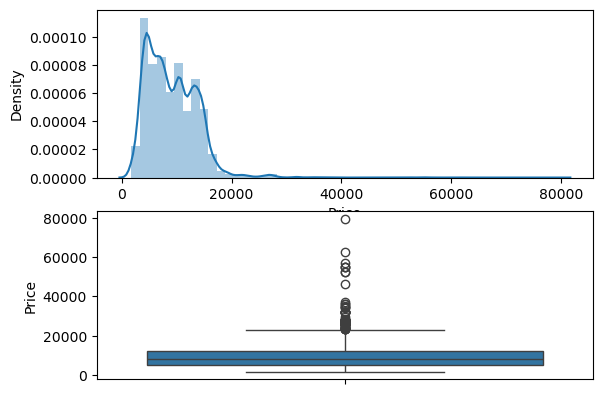

In [156]:
plot(Flight_Final, 'Price')

###### Handling Outliers

###### Replacing the outliers with Median

In [161]:
Flight_Final['Price']=np.where(Flight_Final['Price']>=40000,Flight_Final['Price'].median(),Flight_Final['Price'])

##### Seperating the Dataset into X and Y column

In [164]:
X = Flight_Final.drop('Price', axis = 1)

In [168]:
y = Flight['Price']

In [170]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building

##### Random Forest Regressor

In [184]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [176]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [178]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [180]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [190]:
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2s = r2_score(y_test, y_pred)
               
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 score (R2): {r2s}")

Mean Absolute Error (MAE): 1155.9568543026153
Root Mean Squared Error (RMSE): 2090.2150377623543
R2 score (R2): 0.7973755917151504


#### Decision Tree Regression

In [195]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [197]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [199]:
# Predict
y_pred_dt = dt_model.predict(X_test)

In [201]:
# Evaluate the model's performance
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
r2s_dt = r2_score(y_test, y_pred_dt)
               
print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt}")
print(f"R2 score (R2): {r2s_dt}")

Mean Absolute Error (MAE): 1307.043862111995
Root Mean Squared Error (RMSE): 2434.79503103696
R2 score (R2): 0.7250620834099537


#### Linear Regression

In [206]:
from sklearn.linear_model import LinearRegression

In [208]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [210]:
# Predict
y_pred_lr = lr_model.predict(X_test)

In [216]:
# Evaluate the model's performance
r2s_lr = r2_score(y_test, y_pred_lr)
            
print(f"R2 score (R2): {r2s_lr}")

R2 score (R2): 0.6309778008024087


#### Support Vector Regressor (SVR)

In [219]:
from sklearn.svm import SVR

In [221]:
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [223]:
# Predict
y_pred_svr = svr_model.predict(X_test)

In [225]:
# Evaluate the model's performance
r2s_svr = r2_score(y_test, y_pred_svr)
            
print(f"R2 score (R2): {r2s_svr}")

R2 score (R2): 0.03675641858661782


#### The R2 scores of the Models:
##### Random Forest Regressor - 0.7973755917151504
##### Decision Tree Regressor - 0.7250620834099537
##### Linear Regression - 0.6309778008024087
##### Support Vector Regressor - 0.03675641858661782
######
###### Among the Four Models Random Forest Regressor model has the best r2_score of 0.7973755917151504 followed by Decision Tree Regression model with r2_score of 0.7250620834099537.

#### Hypertuning The Model

In [229]:
from sklearn.model_selection import RandomizedSearchCV

In [231]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [235]:
Rfr=RandomForestRegressor()
Rfr_random=RandomizedSearchCV(estimator=Rfr,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

Rfr_random.fit(X_train,y_train)

# best parameter
Rfr_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 15}

In [237]:
Rfr_random.best_params_

{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 15}

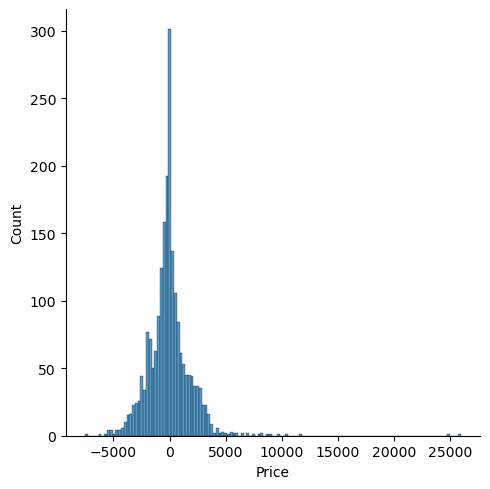

In [239]:
#predicting the values
prediction = Rfr_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [241]:
r2_score(y_test, prediction)

0.825025317696769

### The accuracy increase after Hypertunung the Model.

### __________________________________________________________________________________________________________________________

#### Model Comparison Report

##### Random Forest Regressor - 0.7973755917151504
##### Decision Tree Regressor - 0.7250620834099537
##### Linear Regression - 0.6309778008024087
##### Support Vector Regressor - 0.03675641858661782

##### The Random Forest Regressor model is the best model for prediction with better accuracy rate as compared to the other Models such as 'Decision Tree Regressor', 'Linear Regression', 'Support Vector Regression'.

### Challenges Faced

##### 1) Conversion of 'object' datatype to 'datetime' datatype took more time as many columns were to be altered.
##### 2) Then, after conversion spliting them into columns such as day, month, hour, minute took time.
##### 3) Encoding has never been simple, values were to be  extracted, seperate dataframes were created and encoding was done.
##### 4) Applying Hyperparameter tuning.